### Data ###

In [57]:
import xray

In [58]:
ds = xray.open_dataset('/Users/eapsclimate/Desktop/research/paper/tracks.20130125.nc', decode_cf=False)
ds = ds.to_dataframe()

### Preparation ###

In [59]:
import datetime
import jdcal
import numpy as np
import pandas as pd

In [60]:
ds.head(4)

track  n       j1  cyc         lon        lat        A          L  \
Nobs                                                                      
0         1  1  2448910   -1  636.739990 -65.001099  1.24564  44.464001   
1         1  2  2448917   -1  635.989990 -65.137604  2.64604  36.702400   
2         1  3  2448924   -1  635.820007 -65.245697  3.40119  45.422100   
3         1  4  2448931   -1  635.844971 -65.293297  1.45836  43.021999   

            U  
Nobs           
0     5.97993  
1     8.17373  
2     8.28628  
3     5.20364

In [61]:
def jday_to_datetime(jday, refday=0):
    y, m, d, f = jdcal.jd2gcal(jday, refday)
    h = int(f*24)
    return pd.to_datetime(datetime.datetime(y, m, d, h))

In [62]:
pd_date = ds.j1.apply(jday_to_datetime)

In [63]:
ds.j1 = pd_date
ds = ds.rename(columns = {'j1':'date'})

In [64]:
ds.head(4)

track  n                date  cyc         lon        lat        A  \
Nobs                                                                      
0         1  1 1992-10-14 12:00:00   -1  636.739990 -65.001099  1.24564   
1         1  2 1992-10-21 12:00:00   -1  635.989990 -65.137604  2.64604   
2         1  3 1992-10-28 12:00:00   -1  635.820007 -65.245697  3.40119   
3         1  4 1992-11-04 12:00:00   -1  635.844971 -65.293297  1.45836   

              L        U  
Nobs                      
0     44.464001  5.97993  
1     36.702400  8.17373  
2     45.422100  8.28628  
3     43.021999  5.20364

In [65]:
lon_fix_01 = ds.where(ds.lon <= 540).lon - 360
lon_fix_02 = ds.where(ds.lon > 540).lon - 720

lon_fix = lon_fix_01
lon_fix = lon_fix.fillna(lon_fix_02)
ds.lon = lon_fix

In [66]:
ds.head(4)

track  n                date  cyc        lon        lat        A  \
Nobs                                                                     
0         1  1 1992-10-14 12:00:00   -1 -83.260010 -65.001099  1.24564   
1         1  2 1992-10-21 12:00:00   -1 -84.010010 -65.137604  2.64604   
2         1  3 1992-10-28 12:00:00   -1 -84.179993 -65.245697  3.40119   
3         1  4 1992-11-04 12:00:00   -1 -84.155029 -65.293297  1.45836   

              L        U  
Nobs                      
0     44.464001  5.97993  
1     36.702400  8.17373  
2     45.422100  8.28628  
3     43.021999  5.20364

In [67]:
N = max(ds.track)
M = len(ds.track)

In [68]:
count = ds.track
count = count.value_counts(normalize=False, sort=True, ascending=True, bins=None, dropna=False).reindex(range(1, N+1))
count = pd.DataFrame(count)
count.columns = ['point']

In [69]:
count.head(4)

point
1      4
2      4
3      4
4      4

In [70]:
lon = np.asarray(ds.lon)
lat = np.asarray(ds.lat)
A = np.asarray(ds.A)
L = np.asarray(ds.L)
U = np.asarray(ds.U)
point = np.asarray(count.point)

lon_o = np.zeros((N, 1))
lat_o = np.zeros((N, 1))
A_o = np.zeros((N, 1))
L_o = np.zeros((N, 1))
U_o = np.zeros((N, 1))

lon_t = np.zeros((N, 1))
lat_t = np.zeros((N, 1))
A_t = np.zeros((N, 1))
L_t = np.zeros((N, 1))
U_t = np.zeros((N, 1))

In [71]:
c = 0
i = 0

while i < M:
    
    c = int(c) + 1
    lon_o[c-1] = lon[i]
    lat_o[c-1] = lat[i]
    A_o[c-1] = A[i]
    L_o[c-1] = L[i]
    U_o[c-1] = U[i]

    i = i + int(point[c-1])
    lon_t[c-1] = lon[i-1]
    lat_t[c-1] = lat[i-1]
    A_t[c-1] = A[i-1] 
    L_t[c-1] = L[i-1]
    U_t[c-1] = U[i-1]

In [72]:
lon_o = pd.DataFrame(lon_o)
lat_o = pd.DataFrame(lat_o)
A_o = pd.DataFrame(A_o/100)
L_o = pd.DataFrame(L_o*1000)
U_o = pd.DataFrame(U_o/100)

lat_t = pd.DataFrame(lat_t)
lon_t = pd.DataFrame(lon_t)
A_t = pd.DataFrame(A_t/100)
L_t = pd.DataFrame(L_t*10**3)
U_t = pd.DataFrame(U_t/100)

In [88]:
index = np.zeros(N)

for i in range(0, N):
    index[i] = i+1

In [89]:
co = pd.concat([lon_o, lat_o, A_o, L_o, U_o], axis=1)
co.columns = ['lon', 'lat', 'A', 'L', 'U']

ct = pd.concat([lon_t, lat_t, A_t, L_t, U_t], axis=1)
ct.columns = ['lon', 'lat', 'A', 'L', 'U']

In [90]:
co.index = index
ct.index = index

In [91]:
co.head(4)

lon        lat         A             L         U
1  -83.260010 -65.001099  0.012456  44464.000702  0.059799
2 -159.357971 -62.542400  0.021616  63069.698334  0.048141
3  164.956970 -60.751999  0.065755  66748.397827  0.109810
4  129.165985 -61.428299  0.098479  76040.702820  0.112057

In [92]:
ct.head(4)

lon        lat         A             L         U
1  -84.155029 -65.293297  0.014584  43021.999359  0.052036
2 -159.156006 -62.726101  0.027937  55183.399200  0.047991
3  166.448975 -61.454601  0.044153  94783.096313  0.073925
4  128.390015 -61.127899  0.051956  59744.499207  0.106157

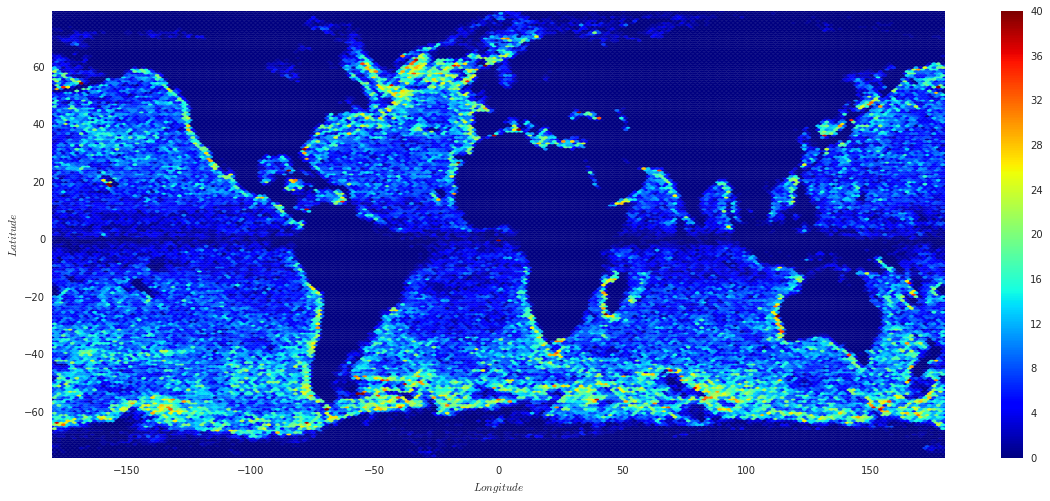

In [174]:
plt.rcParams['figure.figsize'] = (20, 8)
map_origin = coordinate_origin.plot(kind='hexbin', x='lon', y='lat', sharex=False,
                                   gridsize=200, vmin=0, vmax=40, cmap='jet')
plt.xlabel('$Longitude$')
plt.ylabel('$Latitude$')

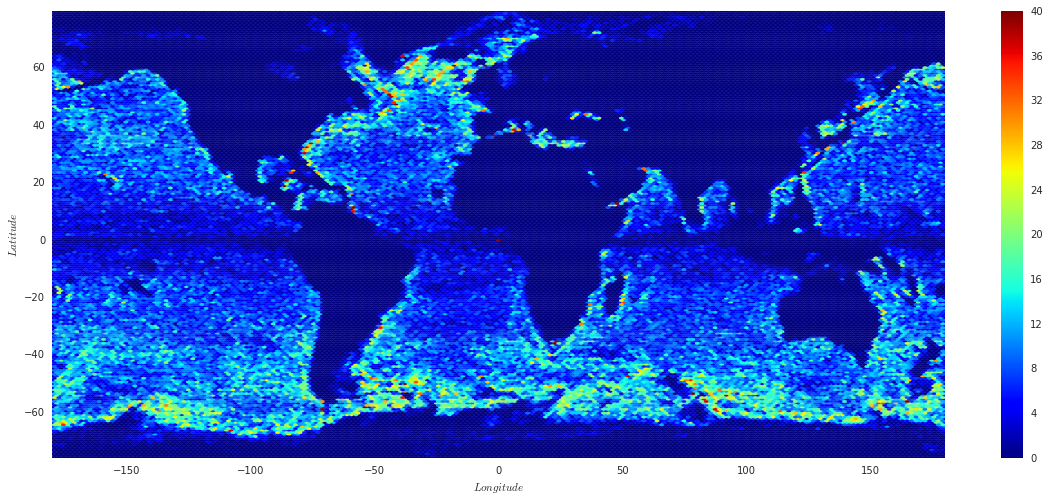

In [175]:
plt.rcParams['figure.figsize'] = (20, 8)
map_termination = coordinate_termination.plot(kind='hexbin', x='lon', y='lat', sharex=False,
                                              gridsize=200, vmin=0, vmax=40, cmap='jet')
plt.xlabel('$Longitude$')
plt.ylabel('$Latitude$')

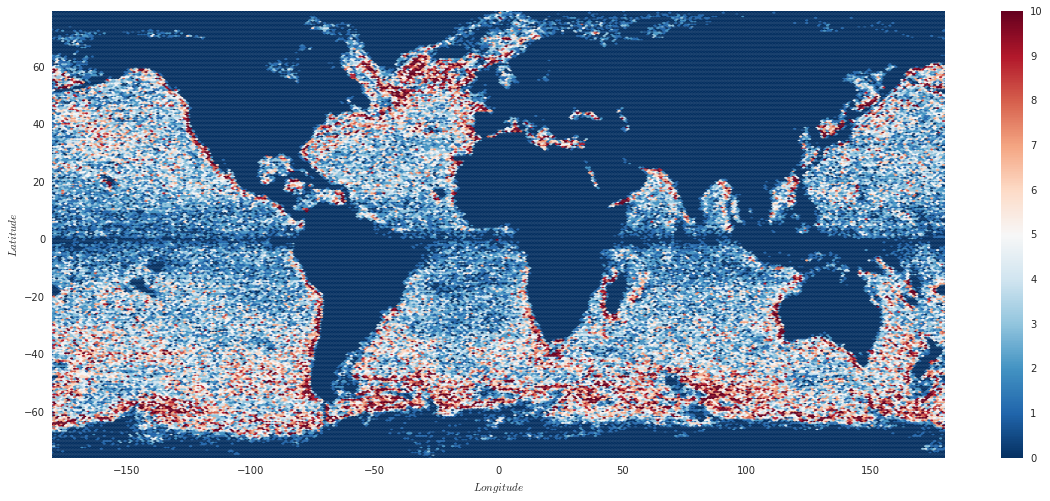

In [177]:
plt.rcParams['figure.figsize'] = (20, 8)
map_origin = pl.hexbin(lon_origin, lat_origin, gridsize=300, vmin=0, vmax=10, cmap=pl.cm.RdBu_r)
pl.colorbar()
plt.xlabel('$Longitude$')
plt.ylabel('$Latitude$')

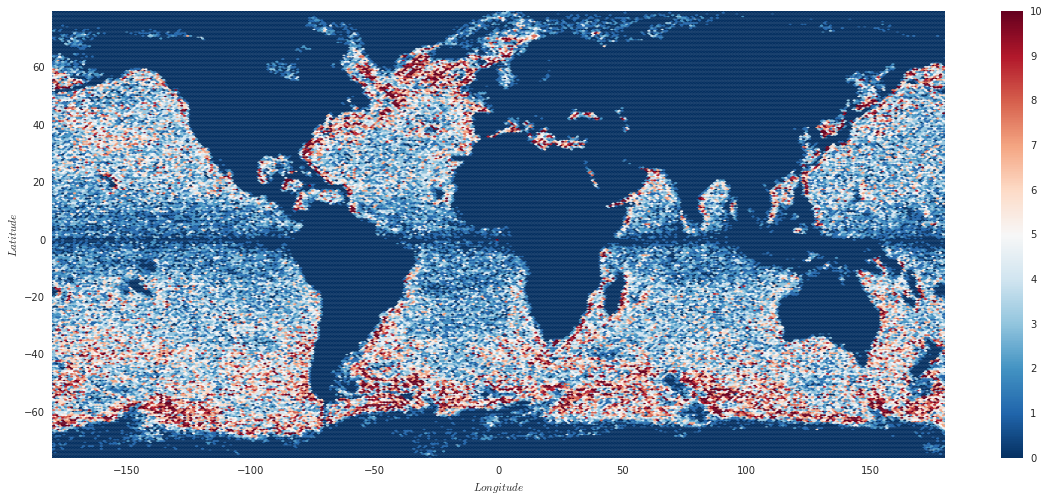

In [179]:
plt.rcParams['figure.figsize'] = (20, 8)
map_termination = pl.hexbin(lon_termination, lat_termination, gridsize=300, vmin=0, vmax=10, cmap=pl.cm.RdBu_r)
pl.colorbar()
plt.xlabel('$Longitude$')
plt.ylabel('$Latitude$')

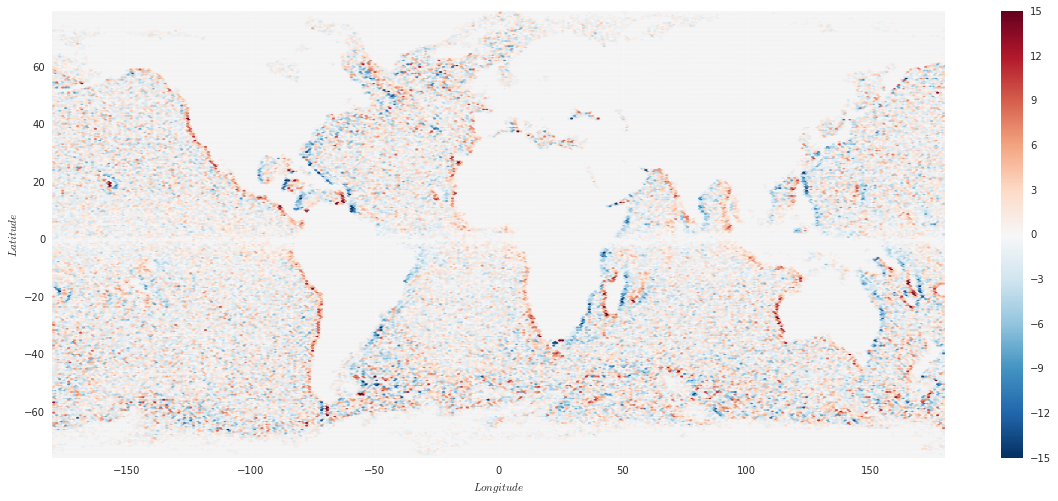

In [181]:
plt.rcParams['figure.figsize'] = (20, 8)
map_difference = pl.hexbin(lon_origin, lat_origin, gridsize=300, vmin=-15, vmax=15, cmap=pl.cm.RdBu_r)
map_difference.set_array(map_origin.get_array()-map_termination.get_array())
pl.colorbar()
plt.xlabel('$Longitude$')
plt.ylabel('$Latitude$')